In [13]:
from image_maker import SkyrimImages

images = SkyrimImages()
images.generate_img_files()
train_imgs = images.load_images('train')
test_imgs = images.load_images('test')
Xtest = test_imgs[0]
Ytest = test_imgs[1]
Xtrain = train_imgs[0]
Ytrain = train_imgs[1]

../Data
Redguard9

In [14]:
import numpy as np
Xhold = Xtrain.copy()
Yhold = Ytrain.copy()
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtrain[i, :] = Xhold[n, :]
    Ytrain[i, :] = Yhold[n, :]
    
Xhold = Xtest
Yhold = Ytest
new = np.array([i for i in range(Xhold.shape[0])])
np.random.shuffle(new)
for i, n in enumerate(new):
    Xtest[i, :] = Xhold[n, :]
    Ytest[i, :] = Yhold[n, :]

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

picsize = 100  # defined in a file

In [16]:
x = tf.placeholder(tf.float32, shape=[None, 100*100*3], name='X')

# When passing through the network, we want to represent the images
# as a 4-tensor: (n_images, image_height, image_width, n_channels)
x_image = tf.reshape(x, [-1, 100, 100, 3], name='ximage')

(1046, 100, 100, 3)


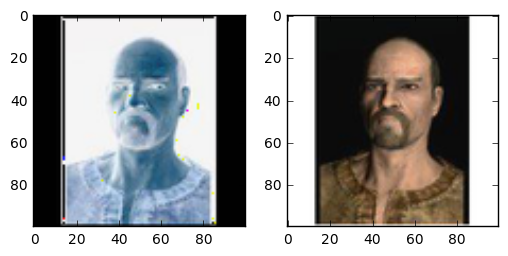

In [17]:
sess = tf.InteractiveSession()
# with tf.Session() as sess:
# Initialize everything and prepare for training.
sess.run(tf.global_variables_initializer())
print(x_image.eval(feed_dict={x:Xtrain}).shape)
img = x_image[0].eval(feed_dict={x:Xtrain})
fig, axes = plt.subplots(1, 2)
ax=list(axes.flatten())
ax[0].imshow(img)
ax[0].grid(False)
ax[1].imshow(Image.fromarray(np.uint8(img)))
ax[1].grid(False)
plt.show()

In [ ]:
# Placeholder for the input data.
x = tf.placeholder(tf.float32, [None, picsize * picsize * 3])
# Placeholder for input class labels.
y = tf.placeholder(tf.float32, [None, len(lst_dogs)])

# Weights.  There are len(lst_dogs) output classes, and one weight per (pixel, output class)
# combination.
W = tf.Variable(tf.truncated_normal([picsize * picsize * 3, len(lst_dogs)], stddev=0.1), name='W')

# Biasies.  This is like an intercept term in a linear regression.  There is one
# per output class.
b = tf.Variable(tf.truncated_normal([len(lst_dogs)], stddev=0.001), name='b')

# Output layer, probabilities of each class.
y_hat = tf.nn.softmax(tf.matmul(x, W) + b)

# Our loss function.
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=y_hat))

# Evaluate the classification accuracy.  What percentage of the test images were
# correctly classified.
prediction = tf.argmax(y_hat, 1)
correct_prediction = tf.equal(prediction, tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))